In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import manufacturing as mn

In [2]:
#raw = pd.read_excel('Venu3_FFP_ASSY.xlsx', usecols=['ProcessType','JobNO','Result','ItemNameType','failitem','Item42','Item46','Item89'])

In [2]:
raw = pd.read_excel('tweak_Venu3_FFP_ASSY.xlsx')

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
chitwig = [16144353,16144364,16126909,16127033,16127104,16144368,16144371,16127152,16127153,16127155]
sharpeye = [16126905,16126906,16126907,16127031,16127032,16127105,16127106,16127151,16127154,16127156]

Trial Run

array([[<AxesSubplot: title={'center': 'False'}, ylabel='Frequency'>,
        <AxesSubplot: title={'center': 'True'}, ylabel='Frequency'>]],
      dtype=object)

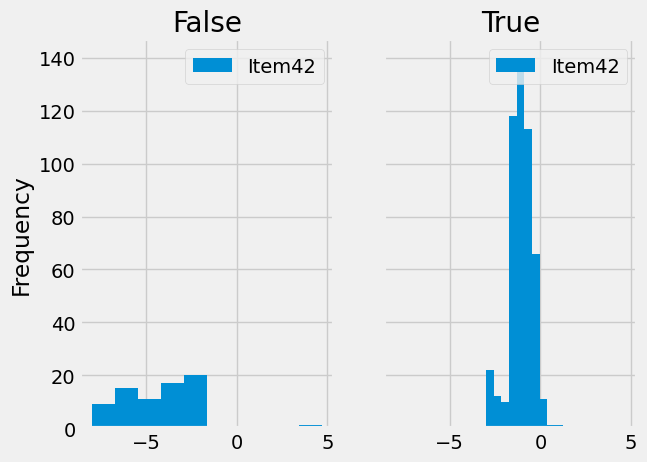

In [5]:
(raw
.assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
.query("ItemNameType==16551 and failitem.isin([0,42]) and Item42>-100")
[['ProcessType','Result','Item42','Vendor']]
.plot.hist(by='Result', sharex=True, sharey=True, layout=(1,2))
)

array([[<AxesSubplot: title={'center': '(chitwig, False)'}, ylabel='Frequency'>,
        <AxesSubplot: title={'center': '(chitwig, True)'}, ylabel='Frequency'>],
       [<AxesSubplot: title={'center': '(sharpeye, False)'}, ylabel='Frequency'>,
        <AxesSubplot: title={'center': '(sharpeye, True)'}, ylabel='Frequency'>]],
      dtype=object)

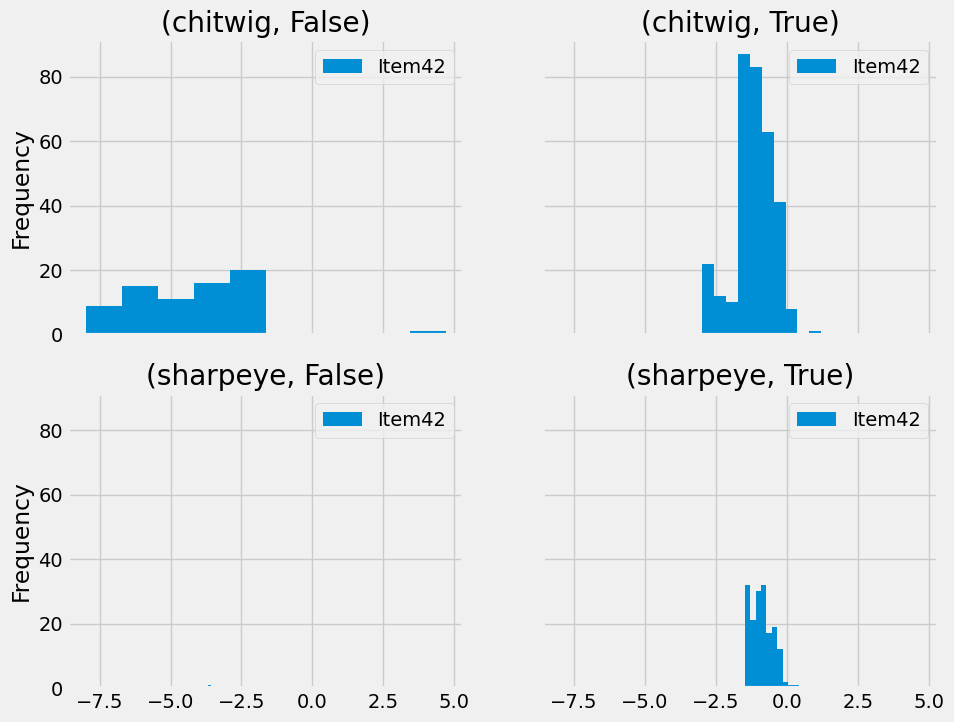

In [6]:
(raw
.assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
.query("ItemNameType==16551 and failitem.isin([0,42]) and Item42>-100")
[['ProcessType','Result','Item42','Vendor']]
.plot.hist(by=['Vendor','Result'],figsize=(10,8), layout=(2,2), sharex=True, sharey=True)
)

def

In [7]:
def my_hisplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.histplot(data = (df
    .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}']])
    ,x=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    )
    )

In [8]:
def my_stripplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.stripplot(data = (df
    .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','Vendor']])
    ,x='Vendor'
    ,y=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    ,dodge=True
    )
    )

HT GPS_ (L1 only) by ref

In [14]:
def tweak_raw(df,itemnametype, item, lower):
    return(df
    .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}']])

In [19]:
tweak_raw(raw,16551,42,-10).query("Result==True").Item42.max()

1.2200018310547

In [22]:
mn.calc_ppk(
tweak_raw(raw,16551,42,-10).query("Result==True").Item42,
upper_specification_limit=1.5, lower_specification_limit=-3
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


1.0079358679790882

In [23]:
mn.suggest_specification_limits(
tweak_raw(raw,16551,42,-10).query("Result==True").Item42
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(-3.4613857392098626, 1.3037330679210073)

<AxesSubplot: title={'center': 'HT GPS_ (L1 only) by ref'}, xlabel='Vendor', ylabel='Item42'>

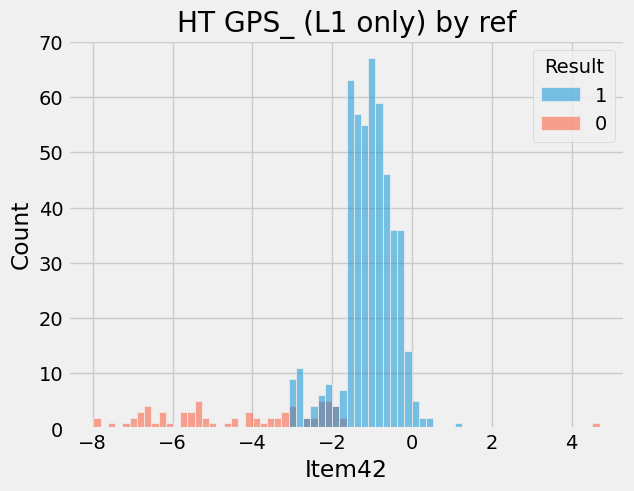

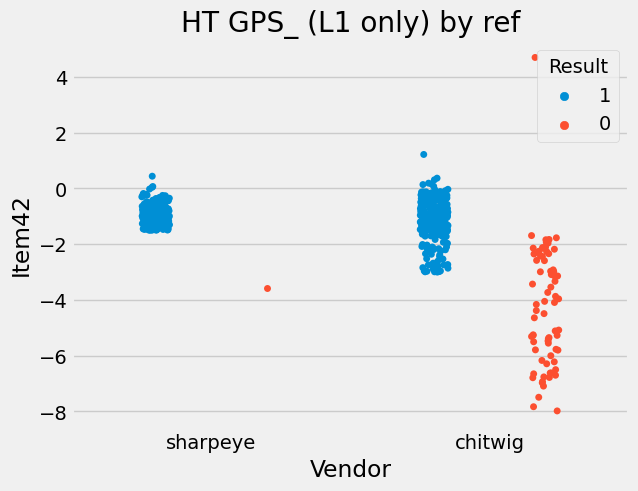

In [9]:
my_hisplot(raw,16551,42,-10, 'HT GPS_ (L1 only) by ref')
my_stripplot(raw,16551,42,-10, 'HT GPS_ (L1 only) by ref')

CT GPS_ (L1 only) by ref

In [24]:
mn.calc_ppk(
tweak_raw(raw,16550,46,-10).query("Result==True").Item46,
upper_specification_limit=1.5, lower_specification_limit=-3
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits


0.6604802999050198

In [26]:
mn.suggest_specification_limits(
tweak_raw(raw,16550,46,-10).query("Result==True").Item46
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(-3.2831756589201833, 2.975951508156573)

<AxesSubplot: title={'center': 'CT GPS_ (L1 only) by ref'}, xlabel='Vendor', ylabel='Item46'>

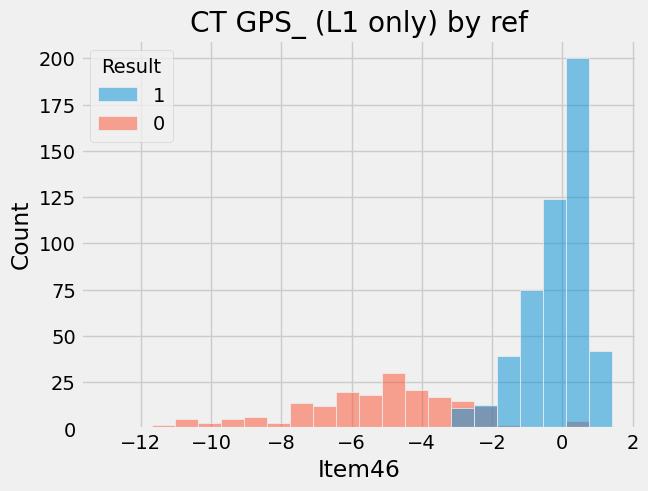

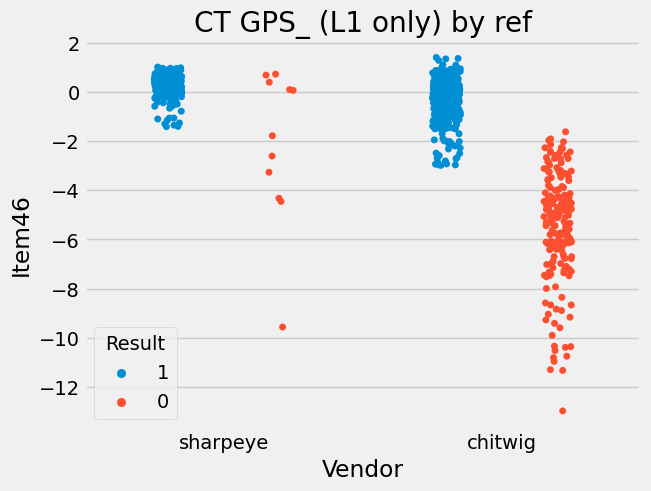

In [10]:
my_hisplot(raw,16550,46,-100, 'CT GPS_ (L1 only) by ref')
my_stripplot(raw,16550,46,-100, 'CT GPS_ (L1 only) by ref')

FT1 GPS_ (L1 only) by ref_BL1

In [28]:
mn.calc_ppk(
tweak_raw(raw,16557,89,-10).query("Result==True").Item89,
upper_specification_limit=1.5, lower_specification_limit=-3
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits


0.6805445350527595

In [29]:
mn.suggest_specification_limits(
tweak_raw(raw,16557,89,-10).query("Result==True").Item89,
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(-2.8153669338312057, 2.7729099169191866)

<AxesSubplot: title={'center': 'FT1 GPS_ (L1 only) by ref_BL1'}, xlabel='Vendor', ylabel='Item89'>

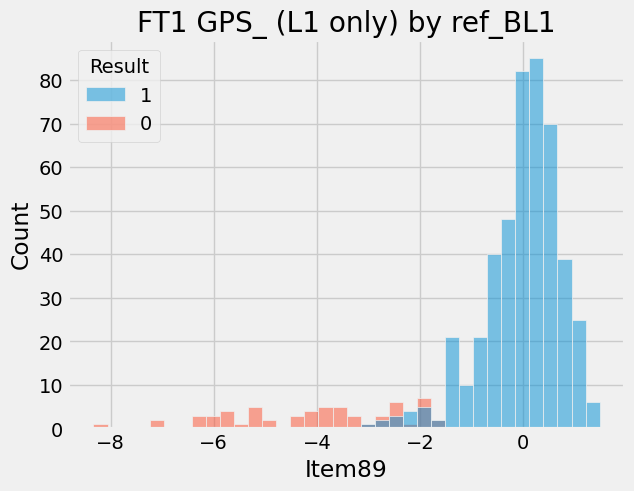

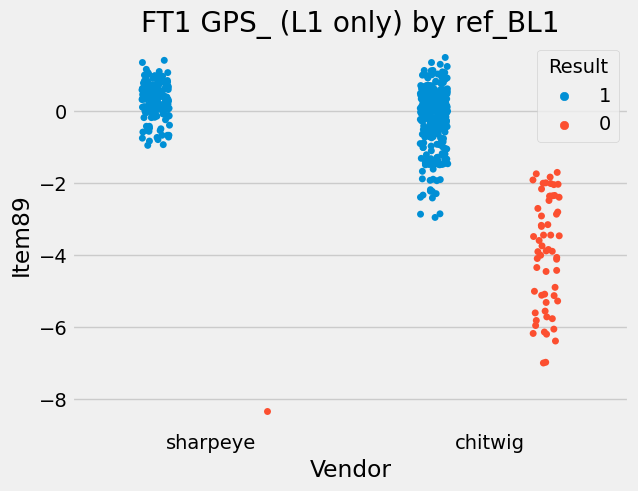

In [11]:
my_hisplot(raw,16557,89,-10, 'FT1 GPS_ (L1 only) by ref_BL1')
my_stripplot(raw,16557,89,-10, 'FT1 GPS_ (L1 only) by ref_BL1')

RT1 GPS_ (L1 only) by ref_BL1

In [30]:
mn.calc_ppk(
tweak_raw(raw,16558,89,-10).query("Result==True").Item89,
upper_specification_limit=1.5, lower_specification_limit=-3
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


1.0501327292225702

In [31]:
mn.suggest_specification_limits(
tweak_raw(raw,16558,89,-10).query("Result==True").Item89,
)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(-3.297798138677059, 1.9168989065437656)

<AxesSubplot: title={'center': 'RT1 GPS_ (L1 only) by ref_BL1'}, xlabel='Vendor', ylabel='Item89'>

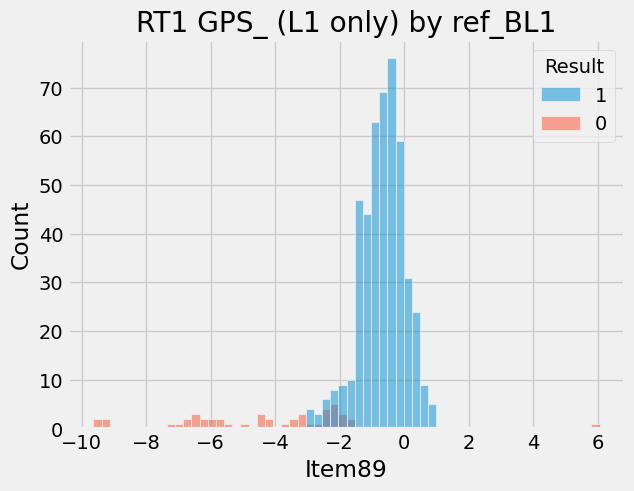

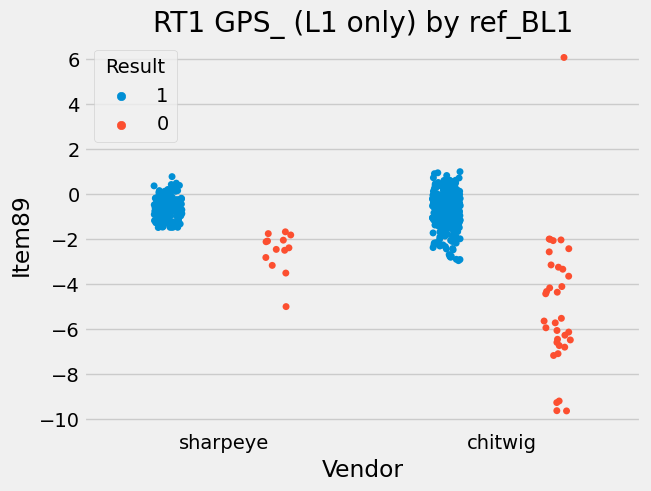

In [12]:
my_hisplot(raw,16558,89,-10,'RT1 GPS_ (L1 only) by ref_BL1')
my_stripplot(raw,16558,89,-10,'RT1 GPS_ (L1 only) by ref_BL1')